<a href="https://colab.research.google.com/github/KieuSonTung/Machine_Learning/blob/main/5.%20Logistic%20Regression/Logistic_Regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
plt.style.available

['Solarize_Light2',
 '_classic_test_patch',
 'bmh',
 'classic',
 'dark_background',
 'fast',
 'fivethirtyeight',
 'ggplot',
 'grayscale',
 'seaborn',
 'seaborn-bright',
 'seaborn-colorblind',
 'seaborn-dark',
 'seaborn-dark-palette',
 'seaborn-darkgrid',
 'seaborn-deep',
 'seaborn-muted',
 'seaborn-notebook',
 'seaborn-paper',
 'seaborn-pastel',
 'seaborn-poster',
 'seaborn-talk',
 'seaborn-ticks',
 'seaborn-white',
 'seaborn-whitegrid',
 'tableau-colorblind10']

In [3]:
plt.style.use('seaborn')

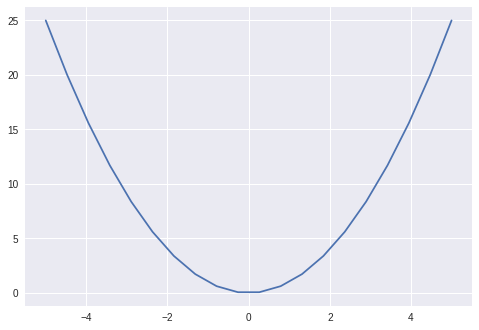

In [4]:
def func(x):
    return x**2

# derivative function of function x
def deri_func(x):
    return 2*x

x = np.linspace(-5, 5, 20)
y = func(x)

plt.plot(x, y)
plt.show()

In [5]:
''' 
x0: initial x
f: derivative function
alpha: learning rates
n_iter: number of loops
'''

def GradientDescent(x0, alpha, n_iter):
    X = []
    for _ in range(n_iter+1):
        X.append(x0)
        x0 = x0 - alpha * deri_func(x0)
    
    return X


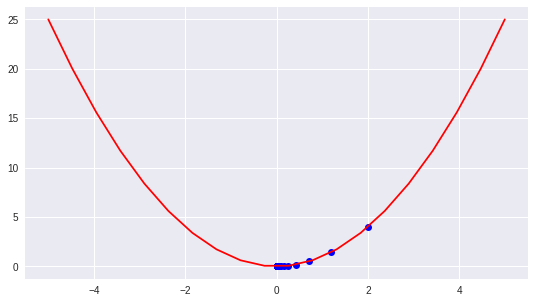

In [6]:
alpha = 0.2
x0 = 2
n_iter = 20

vfunc = np.vectorize(func)

X1 = GradientDescent(x0, alpha, n_iter)
Y1 = vfunc(X1)

plt.figure(figsize=(9, 5))
plt.plot(X1, Y1, 'bo')
plt.plot(x, y, color='r')
plt.show()

In [7]:
df = pd.read_csv('https://raw.githubusercontent.com/nttuan8/DL_Tutorial/master/L2/dataset.csv')

In [8]:
df.head(5)

,Lương,Thời gian làm việc,Cho vay
0,10,1.0,1
1,5,2.0,1
2,6,1.8,1
3,7,1.0,1
4,8,2.0,1


In [166]:
df = df.rename(columns={'Lương': 'x1', 'Thời gian làm việc': 'x2', 'Cho vay': 'y'})
df

,x1,x2,y
0,10,1.00,1
1,5,2.00,1
2,6,1.80,1
3,7,1.00,1
4,8,2.00,1
5,9,0.50,1
6,4,3.00,1
7,5,2.50,1
8,8,1.00,1
9,4,2.50,1


In [142]:
# sigmoid function
def sigmoid(z):
    s = 1/(1 + np.exp(-z))
    return s

# Error funciton
'''
y: given labels
x: observations
w: parameters
'''
def err_func(Y, X, w):
    L = -np.mean(Y * np.log(sigmoid(np.dot(X, w))) + (1-Y) * np.log(1-sigmoid(np.dot(X, w))))
    return L

Y = pd.DataFrame(df['y'])

X = df.drop(columns='y')
X['x0'] = pd.Series(np.ones(len(X)))
Y.shape

(20, 1)

In [ ]:
Y * np.log(sigmoid(np.dot(X, w)))
(1-Y) * np.log(1-sigmoid(np.dot(X, w)))

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:13: RuntimeWarning: divide by zero encountered in log
  del sys.path[0]


Error: y    0.020922
dtype: float64
           0
0   2.265212
1  14.198568
2 -25.516460


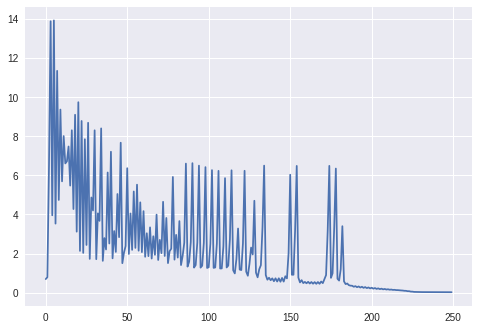

In [156]:
# intitialize w
w = pd.DataFrame(np.zeros(shape=X.shape[1]))

alpha = 2
n_iter = 250
L = [] # List of error after each iteration

for _ in range(n_iter):
    err = err_func(Y, X, w)
    L.append(err)
    for i in range(X.shape[1]):
        w[0][i] = w[0][i] - alpha * np.mean((sigmoid(np.dot(X, w)) - Y.to_numpy()).T * X.to_numpy()[:, i])

plt.plot(L)
plt.show()

In [157]:
print('Error: ' + str(L[-1]))
print(w)

Error: y    0.020922
dtype: float64
           0
0   2.265212
1  14.198568
2 -25.516460


In [163]:
df_test = pd.DataFrame(data=np.array([[2, 3], [1, 8], [5, 5]]), columns=['x1', 'x2'])
df_test['x0'] = np.ones(df_test.shape[0])
df_test

,x1,x2,x0
0,2,3,1.0
1,1,8,1.0
2,5,5,1.0


In [165]:
sigmoid(np.dot(df_test, w))

array([[1.],
       [1.],
       [1.]])